In [40]:
import pandas as pd
import numpy as np

## Calculando manualmente el vector de coeficientes finales

In [62]:
serie = [5, 7, 6, 8, 10, 9, 12, 11]
df = pd.DataFrame({'Y':serie})
df['lag_0'] = 1
type(df.values)

numpy.ndarray

In [68]:
# Verificar que la serie sea estacionaria          p = 0.05
# HO: La serie NO es estacionaria (raiz unitaria)  p >= 0.05
# H1: La serie SI es estacionaria                  p < 0.05
from statsmodels.tsa.stattools import adfuller
p = 0.05
estacionario = adfuller(serie)
print(f"Estadístico: {estacionario[0]}")
print(f"Valor p: {estacionario[1]}")

if estacionario[1] < p:
    print("Rechazar H0, la serie SI es estacionaria")
else:
    print("Usar la HO, la serie NO es estacionaria")

Estadístico: -0.28330365673207797
Valor p: 0.9278359723738464
Usar la HO, la serie NO es estacionaria


<Axes: >

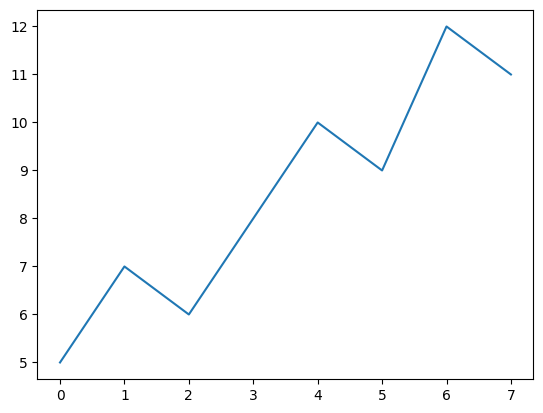

In [63]:
df['Y'].plot()

### Suponiendo que la serie es estacionaria y que se llegó a que un valor de lag óptimo es 4 mediante una PACF

El cálculo de los coeficientes finales ϕ se hace mediante la regresión múltiple: (X_T * X)**-1 (X_T * Y)


In [31]:
# Dado que el valor de lag = 4, el traslape en la creación de la matriz X es:
lag_val = 4+1

for lag in range(1, lag_val):
    df[f'lag_{lag}'] = df['Y'].shift(lag)

df.head()

,Y,lag_0,lag_1,lag_2,lag_3,lag_4
0,5,1,NaN,NaN,NaN,NaN
1,7,1,5.0,NaN,NaN,NaN
2,6,1,7.0,5.0,NaN,NaN
3,8,1,6.0,7.0,5.0,NaN
4,10,1,8.0,6.0,7.0,5.0


In [32]:
df.dropna(inplace=True)
df.head()

,Y,lag_0,lag_1,lag_2,lag_3,lag_4
4,10,1,8.0,6.0,7.0,5.0
5,9,1,10.0,8.0,6.0,7.0
6,12,1,9.0,10.0,8.0,6.0
7,11,1,12.0,9.0,10.0,8.0


In [33]:
X = df.drop(columns=['Y']).values
X

array([[ 1.,  8.,  6.,  7.,  5.],
       [ 1., 10.,  8.,  6.,  7.],
       [ 1.,  9., 10.,  8.,  6.],
       [ 1., 12.,  9., 10.,  8.]])

In [34]:
X.T

array([[ 1.,  1.,  1.,  1.],
       [ 8., 10.,  9., 12.],
       [ 6.,  8., 10.,  9.],
       [ 7.,  6.,  8., 10.],
       [ 5.,  7.,  6.,  8.]])

In [ ]:
Y = df['Y'].values.reshape(-1,1) # Filas lo que sea, columnas 1
Y

array([[10],
       [ 9],
       [12],
       [11]])

Las dimensiónes de las operaciónes son las siguientes:
* X_T = 5 x 4
* X = 4 x 5
* Y = 4 X 1
* X_T * X = (5 x 4)(4 x 5) = 5 x 5
* X_T * Y = (5 X 4)(4 X 1) = 5 X 1  
* (X_T * X)(X_T * Y ) = (5 x 5)(5 X 1) = 5 X 1

ϕ = (X_T*X)**+ (X_T*Y)

In [ ]:
# Vector de phis ϕ
phis = np.linalg.pinv(X.T@X) @ (X.T@Y)
phis

array([[ 5.04166667],
       [ 1.625     ],
       [ 0.73611111],
       [ 0.19444444],
       [-2.76388889]])

## Ahora usando una librería

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, Y)
phis_sklearn = model.coef_.reshape(-1,1)
phis_sklearn

array([[ 5.04166667],
       [ 1.625     ],
       [ 0.73611111],
       [ 0.19444444],
       [-2.76388889]])